## Sentiment Analysis Using Logistic Regression

<font color="blue"> **Setting up the standard libraries** </font>

In [1]:
%matplotlib inline
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick',labelsize = 15)
matplotlib.rc('ytick', labelsize = 15)

<font color="blue"> **Loading the dataset** </font> 

The dataset loaded into this project was a part of the following website - https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

The dataset consists of 3000 sentences which are reviews of products, movies and restaurants. These were collected from three websites namely:
1) imbd.com

2) amazon.com

3) yelp.com

For each website, 1000 reviews were collected with equal number of positive and negative reviews. 

In [2]:
# Reading the data
with open("sentiment_labelled_sentences/full_set.txt") as S:
    readtxt = S.readlines()

# Removing the trailing and leading whitespaces inside the data
readtxt = [i.strip() for i in readtxt]

# From this data, separating the sentences from the labels
reviews = [i.split('\t')[0] for i in readtxt]
labels = [i.split('\t')[1] for i in readtxt]

# Converting the list of labels into an array, for future use
y = np.array(labels,dtype = 'int8')

<font color="blue"> **Removing the punctuation and numbers from the reviews** </font>

In [3]:
def remove_unw(x,word_list):
    '''
    This is a function that removes unwanted 
    words or characters from a list 
    '''
    for elem in word_list:
        
        # Replacing the unwanted word/character with a space
        x = x.replace(elem, ' ')
    return x

In [4]:
# Defining a list of numbers from zero to 9,
# which will be used as a word_list to remove the numbers from the reviews
digits = [str(elem) for elem in range(10)]

In [5]:
# Now removing the numbers from the reviews
refined_revws = [remove_unw(elem, digits) for elem in reviews]

In [6]:
# Now removing the punctuations
final_revws = [remove_unw(elem, list(string.punctuation)) for elem in refined_revws]

In [7]:
# Finally converting all the reviews into lower case
revws = [elem.lower() for elem in final_revws]

<font color="blue"> **Removing all the stop words** </font>

The stop word list was obtained from the website: 

https://www.ranks.nl/stopwords

In [8]:
# A list of stop words
stop_words = set(["a","about","above","after","again","against","all","am","an","and","any","are","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can't","cannot","could","couldn't","did","didn't","do","does","doesn't","doing","don't","down","during","each","few","for","from","further","had","hadn't","has","hasn't","have","haven't","having","he","he'd","he'll","he's","her","here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","i","in","into","is","isn't","it","it's","its","itself","let's","me","more","most","mustn't","my","myself","no","nor","not","of","off","on","once","only","or","other","ough","our","ours","ourselves","out","over","own","same","shan't","she","she'd","she'll","she's","should","shouldn't","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's","these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","wasn't","we","we'd","we'll","we're","we've","were","weren't","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with","won't","would","wouldn't","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"])

In [9]:
# Making each review into a sublist 
# each sublist consists of words used in the respective review
# this will be used for removing the stop words 
revw_list = [elem.split() for elem in revws]


# Now removing the stopwords and joining back the words
# that were split above, into coherent reviews
processed_revws = [' '.join(list(filter(lambda i: i not in stop_words, elem))) for elem in revw_list]

<font color="blue"> **Converting the reviews into a vector using the Bag of words representation** </font>

In [10]:
# Capping the vocabulary to 3000 words
vector = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words = None, max_features = 3000)

data_features = vector.fit_transform(processed_revws)

# Converting the above variable into an array
features_arr = data_features.toarray()

<font color="blue"> Splitting the 3000 words into a training set of 2500 sentences and a test set of 500 sentences (in which the positive and negative sentences are equal in number) </font>

In [11]:
np.random.seed(0)

# Creating an array of test indices
# which is a random set of 250 sentences each for the label 0 and 1
testing_ind = np.append(np.random.choice(np.where(y==0)[0],250,replace = False), np.random.choice(np.where(y==1)[0],250,replace = False))

# Training label indices
training_ind = list(set(range(len(labels)))-set(testing_ind))

# Now assigning the data for testing and training
testing_data = features_arr[testing_ind]
testing_labels = y[testing_ind]

training_data = features_arr[training_ind]
training_labels = y[training_ind]

In [12]:
print(f'The size of the training set is:{training_data.shape} \n')
print(f'The size of the testing set is:{testing_data.shape} \n')

The size of the training set is:(2500, 3000) 

The size of the testing set is:(500, 3000) 



<font color="blue"> **Fitting a logistic regression model by using sklearn's SGDClassifier** </font>

In [13]:
classifier = SGDClassifier(loss = 'log', penalty = 'none')
classifier.fit(training_data,training_labels)

# Getting the parameters w and b
w = classifier.coef_[0,:]
b = classifier.intercept_

In [14]:
# Now using this classifier, perform predictions
# on both the training data and the test data

training_pred = classifier.predict(training_data)
testing_pred = classifier.predict(testing_data)

In [15]:
# Computing the errors

# Training error
train_error = np.sum((training_pred>0)!= (training_labels>0))

# Testing error
test_error = np.sum((testing_pred>0)!= (testing_labels>0))

In [16]:
print(f'The training error is:{float(train_error)/len(training_labels)} \n')

print(f'The training error is:{float(test_error)/len(testing_labels)} \n')


The training error is:0.012 

The training error is:0.2 



<font color="blue"> **Finding those words with largest +ve and -ve influence in the whole product review data** </font>

In [17]:
# Forming the array containing the vocabulary 
vocabulary = np.array([z[0] for z in sorted(vector.vocabulary_.items(),key = None)])

# Sorting the array w in an ascending order 
# and hence returns the indices of the respective elements
indices = np.argsort(w)

# Extracting the top 25 -ve indices
negative_ind = indices[0:25]
# Extracting the top 25 -ve indices
positive_ind = indices[-24:-1]

# now displaying the most +ve words and -ve words
print(f'The words with the most +ve influence are:\n {[str(elem) for elem in list(vocabulary[positive_ind])]} \n')

print(f'The words with the most -ve influence are:\n {[str(elem) for elem in list(vocabulary[negative_ind])]} \n')

The words with the most +ve influence are:
 ['data', 'incredible', 'pleased', 'clear', 'assure', 'silent', 'joy', 'quick', 'world', 'love', 'delicious', 'sturdy', 'works', 'nice', 'occasionally', 'awesome', 'brings', 'art', 'perfect', 'beautiful', 'loved', 'enjoyed', 'liked'] 

The words with the most -ve influence are:
 ['beep', 'pm', 'poor', 'sucks', 'avoid', 'worst', 'mediocre', 'aren', 'fly', 'unfortunately', 'slow', 'stupid', 'bland', 'lacks', 'worse', 'waste', 'produce', 'ok', 'literally', 'guess', 'torture', 'fat', 'disappointing', 'mess', 'failed'] 



<font color = 'blue'> **Margin Analysis** </font>

In [18]:
# Defining a function that returns the number of points in the data
# which lie in the interval [0 to 0.5-gamma] or [0.5+gamma to 1]

# where gamma is the margin which is the perpendicular distance 
# from the decision boundary to boundaries that lie parallel to the decision boundary

def margin_counts(classif,test_data,gamma):
    
    # Find the probability on each test point
    predict = classif.predict_proba(test_data)[:,1]
    
    # Now find those points for which the prediction is at least gamma away from 0.5
    margin_ind = np.where((predict>(0.5+gamma))| (predict<(0.5-gamma)))[0]
    
    return float(len(margin_ind))

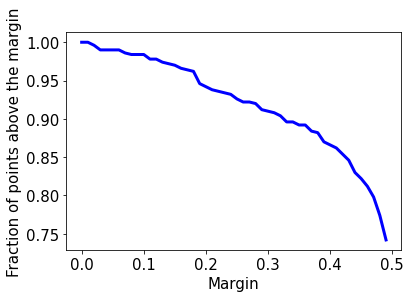

In [19]:
gamma = np.arange(0,0.5,0.01)
h = np.vectorize(lambda elem:margin_counts(classifier,testing_data,elem))
plt.plot(gamma,h(gamma)/500.0, linewidth=3, color = 'blue')
plt.xlabel('Margin',fontsize = 15)
plt.ylabel('Fraction of points above the margin', fontsize = 15)
plt.show()

In [20]:
# now defining a function that returns the error of predictions

def err_margin(classif,test_data,tst_label,gamma):
    
    # Find the probability on each test point
    predict = classif.predict_proba(test_data)[:,1]
    
    # Now find those points for which the prediction is at least gamma away from 0.5
    margin_ind = np.where((predict>(0.5+gamma))| (predict<(0.5-gamma)))[0]
    
    # Find the error for these data points
    err = np.sum((predict[margin_ind]>0.5)!=(tst_label[margin_ind]>0.0))
    
    return float(err)/len(margin_ind)

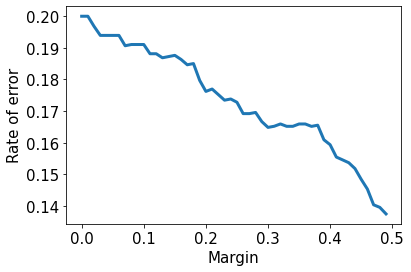

In [21]:
# computing the margin errors on the test data 
h = np.vectorize(lambda elem: err_margin(classifier, testing_data, testing_labels,elem))

plt.plot(gamma,h(gamma), linewidth = 3)
plt.ylabel('Rate of error',fontsize = 15)
plt.xlabel('Margin', fontsize = 15)
plt.show()